In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("..\\fichiers\\data_maison.csv")
data.head()

,Nbr_chambre,Surface,Code_postal,Date_achat,Prix
0,4,296.515426,H4N 7Y1,2019/3/27,378117.855776
1,3,304.989454,H9E 5S2,2018/5/18,401613.977023
2,5,300.448827,H5D 4G6,2020/3/17,409934.827089
3,4,300.089579,H8O 9Q7,2020/9/6,402694.602164
4,5,300.388223,H4U 8K6,2018/10/7,409936.521220


In [4]:
df = data.copy()
df.head(2)

,Nbr_chambre,Surface,Code_postal,Date_achat,Prix
0,4,296.515426,H4N 7Y1,2019/3/27,378117.855776
1,3,304.989454,H9E 5S2,2018/5/18,401613.977023


In [5]:
# Proceder à la vérification du type des 5 variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nbr_chambre  5000 non-null   int64  
 1   Surface      5000 non-null   float64
 2   Code_postal  5000 non-null   object 
 3   Date_achat   5000 non-null   object 
 4   Prix         5000 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 195.4+ KB


In [9]:
# Faire la conversion de type qui semble nécessaire
df.Surface = pd.to_numeric(df.Surface)
df.Prix = pd.to_numeric(df.Prix)

# on peut utiliser pd.todatetime et aussi préciser le format
df["Date_achat"] = pd.to_datetime(df.Date_achat, format = "%Y-%m-%d")
df.dtypes

Nbr_chambre             int64
Surface               float64
Code_postal            object
Date_achat     datetime64[ns]
Prix                  float64
dtype: object

In [10]:
# importer les librairies pour tracer les figures
import matplotlib.pyplot as plt
import seaborn as sns

# Pour ignorer les warnings :
import warnings
warnings.filterwarnings('ignore')

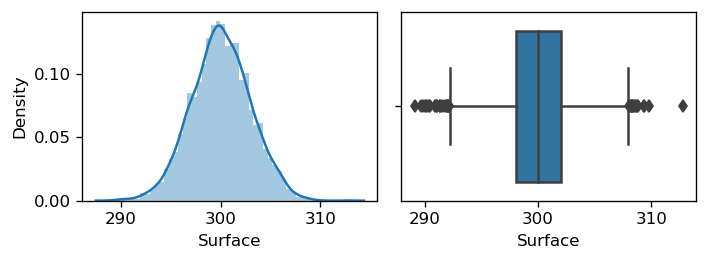

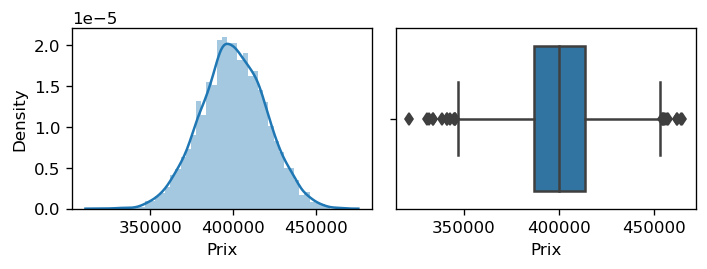

In [11]:
# faire une boucle sur les deux colonnes qui nous intéressent, Surface et Prix
for col in df[["Surface", "Prix"]]:
    # fixer la taille de la figure
    plt.figure(figsize=(6, 4), dpi = 120)
    # ici on indique la division du plot: 2 lignes, 2 colonnes, 1er plot (à gauche)
    plt.subplot(2,2,1)
    # tracer la distribution
    sns.distplot(df[col])
    # ici on indique la division du plot: 2 lignes, 2 colonnes, 2eme plot (à droite)
    plt.subplot(2,2,2)
    # tracer le boxplot
    sns.boxplot(data = df, x = col)
    plt.tight_layout()
    plt.draw()

In [12]:
# créer une fonction qui prend une série du dataframe en entrée 
# et retourne le dataframe avec les lignes contenants les valeurs extremes 
def get_outliers(df_serie):
    Q1 = df_serie.quantile(0.25)
    Q3 = df_serie.quantile(0.75)
    #IQR: interquartile range
    IQR = Q3 - Q1    
    myfilter = (df_serie < Q1 - 1.5 * IQR) | (df_serie > Q3 + 1.5 *IQR)
    return df[myfilter] 

In [13]:
# Valeurs extremes pour la série Surface
get_outliers(df.Surface)

,Nbr_chambre,Surface,Code_postal,Date_achat,Prix
175,3,290.988793,H8B 1E1,2020-10-14,391872.067856
187,5,292.133724,H5C 2Z0,2019-09-03,412456.682189
375,3,291.936083,H5H 8P3,2017-05-27,353580.308188
389,3,308.379761,H8B 2V6,2018-08-06,407486.672583
408,3,308.245791,H7J 2H8,2018-10-07,436916.623447
754,5,308.787414,H0P 2M4,2018-05-19,406905.191996
799,5,290.167950,H5M 3L4,2017-03-06,392060.817229
952,3,309.820060,H8E 0F8,2018-01-17,390967.803346
1200,4,308.729897,H8H 0F9,2019-11-12,408190.547050
1204,3,308.591576,H8A 9K2,2017-06-04,369018.436443


In [14]:
# Valeurs extremes pour la série Surface
get_outliers(df.Prix)

,Nbr_chambre,Surface,Code_postal,Date_achat,Prix
19,3,297.329571,H9V 3B2,2017-09-17,464203.332452
88,3,300.548223,H0X 6Q6,2019-10-24,456834.707339
198,3,296.228650,H8Z 8S9,2017-05-04,454601.026179
207,3,298.295710,H8I 7G9,2019-07-13,454816.769688
212,5,302.562344,H6O 7N4,2019-06-05,461880.400469
353,5,299.922366,H5R 9P9,2017-08-24,341171.051167
376,4,296.272783,H3A 5N8,2017-10-10,331636.261068
391,4,298.445490,H6U 3E9,2017-06-23,342622.835001
511,4,295.293996,H0C 3G0,2017-09-04,455583.416249
831,4,298.144151,H6G 1M8,2017-11-06,454163.701261


In [15]:
# Procéder à la mise à l'échelle en utilisant RobustScaler de sklearn.preprocessing
from sklearn.preprocessing import RobustScaler

In [16]:
# créer l'objet RobustScaler
rsc = RobustScaler()

In [17]:
# faire un fit_transform 
resultat = rsc.fit_transform(df[["Surface", "Prix"]])
print(resultat)

[[-0.88658861 -0.81247693]
 [ 1.26438663  0.06654354]
 [ 0.11183262  0.37783736]
 ...
 [-0.39240864 -1.33576257]
 [ 0.09345016  1.01310129]
 [ 0.31357903  0.36833713]]


In [ ]:
# mettre le resultat dans un dataframe
df_rsc= pd.DataFrame(resultat, columns = ["Surface_rsc", "Prix_rsc"])
df_rsc